In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("kc_house_data.csv")
# 顯示dataset的形狀，共21613比資料，每一比資料有21種不同資訊。
data.shape

(21613, 21)

In [3]:
# 將顯示列數設定為25，不然會有部份資料無法顯示
pd.options.display.max_columns = 25
# head 會顯示前五行的數據
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# 將date日期拆為年、月和日並轉成數值
data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))

# 刪除沒有用的數據，inplace則是將更新後的資料存回原本的地方
data.drop(['id'], axis="columns", inplace=True)
data.drop(['date'], axis="columns", inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [6]:

data_num = data.shape[0]
# 取得一筆與data數量相同的亂數索引，主要目的是用於打散資料
indexes = np.random.permutation(data_num)
# 並將亂數索引值分為Train、validation和test分為，這裡的劃分比例為6:2:2
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
# 透過索引值從data取出訓練資料、驗證資料和測試資料
train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

In [7]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()

train_data = (train_data - mean) / std
val_data = (val_data - mean) / std

In [8]:

x_train = np.array(train_data.drop('price', axis='columns'))
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis='columns'))
y_val = np.array(val_data['price'])

In [9]:
x_train.shape

(12967, 21)

In [10]:
# 建立一個Sequential型態的model
model = keras.Sequential(name='model-1')
# 第1層全連接層設為64個unit，將輸入形狀設定為(21, )，而實際上我們輸入的數據形狀為(batch_size, 21)
model.add(layers.Dense(64, activation='relu', input_shape=(21,)))
# 第2層全連接層設為64個unit
model.add(layers.Dense(64, activation='relu'))
# 最後一層全連接層設為1個unit
model.add(layers.Dense(1))
# 顯示網路模型架構
model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

In [12]:
model_dir = 'lab2-logs/models/'
os.makedirs(model_dir)

In [13]:
# TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔
log_dir = os.path.join('lab2-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                        monitor='val_mean_absolute_error', 
                                        save_best_only=True, 
                                        mode='min')

In [14]:
history = model.fit(x_train, y_train,  # 傳入訓練數據
               batch_size=64,  # 批次大小設為64
               epochs=300,  # 整個dataset訓練300遍
               validation_data=(x_val, y_val),  # 驗證數據
               callbacks=[model_cbk, model_mckp])  # Tensorboard回調函數紀錄訓練過程，ModelCheckpoint回調函數儲存最好的模型

Epoch 1/300
203/203 [==============================] - 2s 8ms/step - loss: 0.5314 - mean_absolute_error: 0.4295 - val_loss: 0.2545 - val_mean_absolute_error: 0.3037
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1944 - mean_absolute_error: 0.2766 - val_loss: 0.2139 - val_mean_absolute_error: 0.2881
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1950 - mean_absolute_error: 0.2765 - val_loss: 0.1912 - val_mean_absolute_error: 0.2632
Epoch 4/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1524 - mean_absolute_error: 0.2464 - val_loss: 0.1811 - val_mean_absolute_error: 0.2555
Epoch 5/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1413 - mean_absolute_error: 0.2365 - val_loss: 0.1854 - val_mean_absolute_error: 0.2552
Epoch 6/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1342 - mean_absolute_error: 0.2270 - val_loss: 0.1840 - val_mean_absolute_error: 0.2575
Epoch 7/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0507 - mean_absolute_error: 0.1553 - val_loss: 0.1290 - val_mean_absolute_error: 0.2083
Epoch 51/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0517 - mean_absolute_error: 0.1568 - val_loss: 0.1347 - val_mean_absolute_error: 0.2139
Epoch 52/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0539 - mean_absolute_error: 0.1580 - val_loss: 0.1330 - val_mean_absolute_error: 0.2129
Epoch 53/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0541 - mean_absolute_error: 0.1573 - val_loss: 0.1269 - val_mean_absolute_error: 0.2063
Epoch 54/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0508 - mean_absolute_error: 0.1546 - val_loss: 0.1374 - val_mean_absolute_error: 0.2076
Epoch 55/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0510 - mean_absolute_error: 0.1538 - val_loss: 0.1314 - val_mean_absolute_error: 0.2104
Epoch 56/300
203/

203/203 [==============================] - 1s 3ms/step - loss: 0.0414 - mean_absolute_error: 0.1433 - val_loss: 0.1348 - val_mean_absolute_error: 0.2145
Epoch 100/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0368 - mean_absolute_error: 0.1382 - val_loss: 0.1387 - val_mean_absolute_error: 0.2137
Epoch 101/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0382 - mean_absolute_error: 0.1397 - val_loss: 0.1412 - val_mean_absolute_error: 0.2164
Epoch 102/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0381 - mean_absolute_error: 0.1389 - val_loss: 0.1469 - val_mean_absolute_error: 0.2224
Epoch 103/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0384 - mean_absolute_error: 0.1402 - val_loss: 0.1425 - val_mean_absolute_error: 0.2166
Epoch 104/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0378 - mean_absolute_error: 0.1414 - val_loss: 0.1415 - val_mean_absolute_error: 0.2169
Epoch 105/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0323 - mean_absolute_error: 0.1319 - val_loss: 0.1507 - val_mean_absolute_error: 0.2220
Epoch 149/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0332 - mean_absolute_error: 0.1323 - val_loss: 0.1523 - val_mean_absolute_error: 0.2228
Epoch 150/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0343 - mean_absolute_error: 0.1327 - val_loss: 0.1472 - val_mean_absolute_error: 0.2230
Epoch 151/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0308 - mean_absolute_error: 0.1287 - val_loss: 0.1519 - val_mean_absolute_error: 0.2251
Epoch 152/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0338 - mean_absolute_error: 0.1339 - val_loss: 0.1538 - val_mean_absolute_error: 0.2224
Epoch 153/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0312 - mean_absolute_error: 0.1294 - val_loss: 0.1558 - val_mean_absolute_error: 0.2301
Epoch 154/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0323 - mean_absolute_error: 0.1294 - val_loss: 0.1497 - val_mean_absolute_error: 0.2218
Epoch 198/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.1277 - val_loss: 0.1525 - val_mean_absolute_error: 0.2232
Epoch 199/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0301 - mean_absolute_error: 0.1271 - val_loss: 0.1526 - val_mean_absolute_error: 0.2233
Epoch 200/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0281 - mean_absolute_error: 0.1245 - val_loss: 0.1556 - val_mean_absolute_error: 0.2253
Epoch 201/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0281 - mean_absolute_error: 0.1247 - val_loss: 0.1564 - val_mean_absolute_error: 0.2288
Epoch 202/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0293 - mean_absolute_error: 0.1265 - val_loss: 0.1539 - val_mean_absolute_error: 0.2227
Epoch 203/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0256 - mean_absolute_error: 0.1192 - val_loss: 0.1561 - val_mean_absolute_error: 0.2269
Epoch 247/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0273 - mean_absolute_error: 0.1217 - val_loss: 0.1574 - val_mean_absolute_error: 0.2269
Epoch 248/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0276 - mean_absolute_error: 0.1222 - val_loss: 0.1549 - val_mean_absolute_error: 0.2248
Epoch 249/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0252 - mean_absolute_error: 0.1191 - val_loss: 0.1605 - val_mean_absolute_error: 0.2289
Epoch 250/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0272 - mean_absolute_error: 0.1206 - val_loss: 0.1598 - val_mean_absolute_error: 0.2288
Epoch 251/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0276 - mean_absolute_error: 0.1227 - val_loss: 0.1583 - val_mean_absolute_error: 0.2299
Epoch 252/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0244 - mean_absolute_error: 0.1173 - val_loss: 0.1524 - val_mean_absolute_error: 0.2275
Epoch 296/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0237 - mean_absolute_error: 0.1157 - val_loss: 0.1538 - val_mean_absolute_error: 0.2259
Epoch 297/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0240 - mean_absolute_error: 0.1159 - val_loss: 0.1547 - val_mean_absolute_error: 0.2273
Epoch 298/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0233 - mean_absolute_error: 0.1148 - val_loss: 0.1566 - val_mean_absolute_error: 0.2289
Epoch 299/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0236 - mean_absolute_error: 0.1154 - val_loss: 0.1559 - val_mean_absolute_error: 0.2285
Epoch 300/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0238 - mean_absolute_error: 0.1160 - val_loss: 0.1537 - val_mean_absolute_error: 0.2261


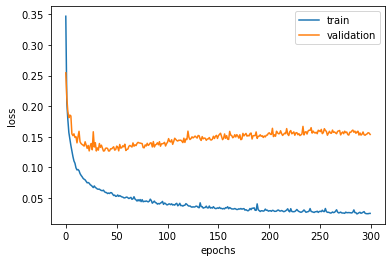

In [15]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [16]:
model_1 = keras.models.load_model('lab2-logs/models/Best-model-1.h5')
y_test=np.array(test_data['price'])
test_data=(test_data-mean)/std
x_test=np.array(test_data.drop('price',axis='columns'))

y_pred = model_1.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_1: {:.2f}%".format(percentage_error))

Model_1: 13.55%
